Stopwords are common words in a language that are usually filtered out before processing natural language data. These words do not carry much meaningful information for tasks like text classification, sentiment analysis, or information retrieval, and are therefore removed to reduce noise and improve performance.

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [8]:
fake_df = pd.read_csv("data/fake.csv")
real_df = pd.read_csv("data/true.csv")

In [9]:
fake_df['label'] = 0  # Fake
real_df['label'] = 1  # Real

df = pd.concat([fake_df, real_df])
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle


In [10]:
print(df.head())
print(df.info())
print(df.describe())
print(df['label'].value_counts())
df.isnull().sum()


                                               title  \
0  Illinois governor to block Chicago schools' fu...   
1  Trump's voter fraud probe could pave way for t...   
2  BUSTED! UNCOVERED 2009 VIDEO Shows London’s Mu...   
3   The Supreme Court Delivered A MAJOR Blow To N...   
4  RADICAL LEFTIST WHO DISMISSED CHARGES AGAINST ...   

                                                text          subject  \
0  CHICAGO (Reuters) - Illinois Governor Bruce Ra...     politicsNews   
1  WASHINGTON (Reuters) - President Donald Trump’...     politicsNews   
2  London s Muslim Mayor Sadiq Khan, called on th...         politics   
3  One of the selling points of Donald Trump s Su...             News   
4  We re not sure which of Judge Mary Murguia s q...  Government News   

                date  label  
0     July 17, 2017       1  
1  January 26, 2017       1  
2        Jun 6, 2017      0  
3     March 22, 2017      0  
4        May 5, 2015      0  
<class 'pandas.core.frame.DataFrame'>
RangeI

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [11]:
df = df[['title', 'text', 'label']]
df['content'] = df['title'] + " " + df['text']
df.drop(['title', 'text'], axis=1, inplace=True)

In [12]:
df['content'].fillna('', inplace=True)


C:\Users\a\AppData\Local\Temp\ipykernel_15428\3972664930.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['content'].fillna('', inplace=True)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    df['content'], df['label'], test_size=0.2, random_state=42
)


In [14]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [32]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [16]:
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [18]:
# Predict using Logistic Regression
y_pred_lr = lr_model.predict(X_test_tfidf)

In [33]:
y_pred = nb_model.predict(X_test_tfidf)

In [19]:
print("🔹 Logistic Regression Evaluation 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

🔹 Logistic Regression Evaluation 🔹
Accuracy: 0.9874164810690423
Confusion Matrix:
 [[4624   67]
 [  46 4243]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4691
           1       0.98      0.99      0.99      4289

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [21]:
print("🔸 Naive Bayes Evaluation 🔸")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

🔸 Naive Bayes Evaluation 🔸
Accuracy: 0.9358574610244988
Confusion Matrix:
 [[4423  268]
 [ 308 3981]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      4691
           1       0.94      0.93      0.93      4289

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [ ]:
models = ['Naive Bayes', 'Logistic Regression']
accuracies = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_lr)]

# Print comparison
for model, acc in zip(models, accuracies):
    print(f"{model} Accuracy: {acc:.4f}")


Naive Bayes Accuracy: 0.9359
Logistic Regression Accuracy: 0.9874


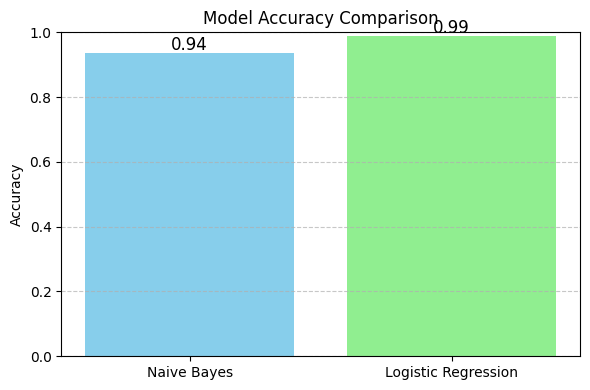

In [23]:
plt.figure(figsize=(6,4))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


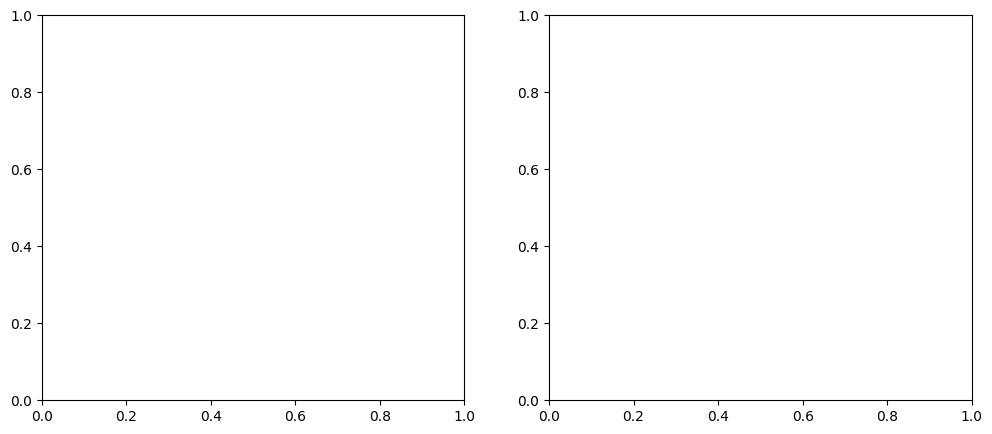

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

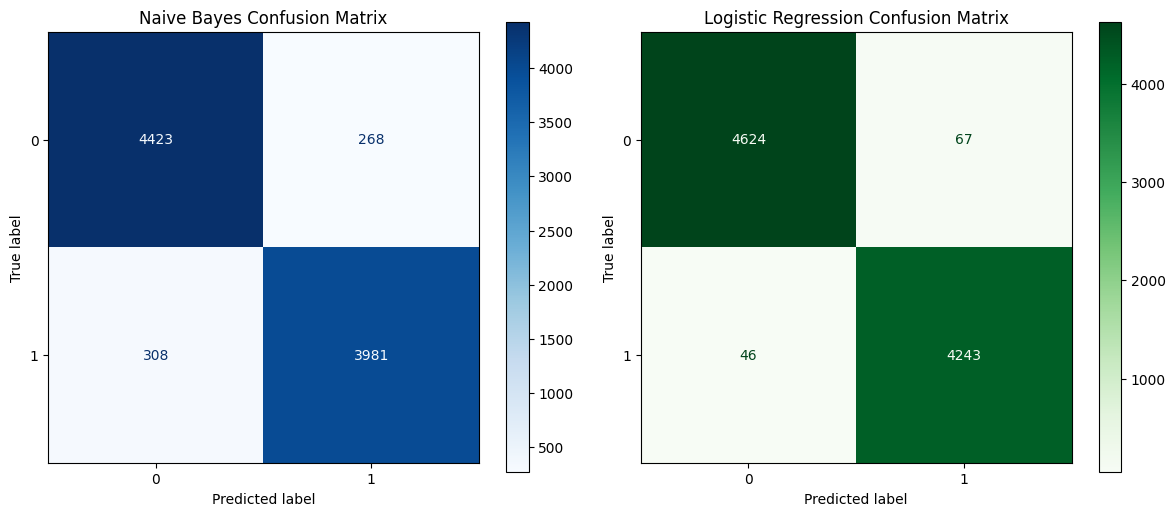

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

cm_nb = confusion_matrix(y_test, y_pred)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_model.classes_)

disp_nb.plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Naive Bayes Confusion Matrix")

# LR Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)
disp_lr.plot(ax=axes[1], cmap='Greens')
axes[1].set_title("Logistic Regression Confusion Matrix")

plt.tight_layout()
plt.show()

In [36]:
joblib.dump(nb_model, "naive_bayes_model.joblib")
joblib.dump(lr_model, "logistic_regression_model.joblib")
joblib.dump(vectorizer, "tfidf_vectorizer.joblib")

print("✅ Models and vectorizer saved successfully!")

✅ Models and vectorizer saved successfully!
